## A5 : Visualisation - Perceptual Mapping for Business
                                varuny
                                V01107265
<br>
<hr style="width:80%; height:1px;">

### b : Plotting variable 'nontotal_n' on the Karnataka state map

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
# Reading the file into Python
data = pd.read_csv("NSSO68.csv")
data.head()

C:\Users\varuny\AppData\Local\Temp\ipykernel_21840\1221107862.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [3]:
# Filtering for KA
df = data[data['state_1'] == "KA"]
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
23109,23110,46099999999999994133134266335232.0,1,46141,68,10,1,2,29,294,...,0.003571,0.0,0.0,17.860714,373.986857,17.925351,KA,4,20.642857,61.685714
23110,23111,46099999999999994133134266335232.0,1,46141,68,10,1,2,29,294,...,0.001667,0.0,0.0,6.668333,676.954000,25.517352,KA,4,25.333333,137.433333
23111,23112,46099999999999994133134266335232.0,1,46141,68,10,1,2,29,294,...,0.000000,0.0,0.0,7.000000,652.801800,25.470640,KA,4,28.800000,124.296000
23112,23113,46099999999999994133134266335232.0,1,46141,68,10,1,2,29,294,...,0.002000,0.0,0.0,0.002000,680.976667,29.984010,KA,4,87.000000,223.453333
23113,23114,46099999999999994133134266335232.0,1,46141,68,10,1,2,29,294,...,0.004800,0.0,0.0,11.604800,516.512000,17.760602,KA,4,7.800000,62.096000


In [4]:
# Display dataset info
print("Dataset Information:\n")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
23109  23110  46099999999999994133134266335232.0             1       46141   
23110  23111  46099999999999994133134266335232.0             1       46141   
23111  23112  46099999999999994133134266335232.0             1       46141   
23112  23113  46099999999999994133134266335232.0             1       46141   
23113  23114  46099999999999994133134266335232.0             1       46141   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
23109     68               10       1       2     29           294  ...   
23110     68   

In [5]:
# Finding missing values
missing_info = df.isna().sum()
print("Missing Values Information:\n")
print(missing_info)

Missing Values Information:

slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [6]:
# Subsetting the data
kanew = df[["state_1", "District", "Region", "Sector", "State_Region", "Meals_At_Home", 
            "eggsno_v", "fishprawn_v", "goatmeat_v", "beef_v", "pork_v", "chicken_v", 
            "othrbirds_v", "No_of_Meals_per_day"]]

In [7]:
# Impute missing values with mean for specific columns
kanew["Meals_At_Home"].fillna(kanew["Meals_At_Home"].mean(), inplace=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_21840\4052813784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kanew["Meals_At_Home"].fillna(kanew["Meals_At_Home"].mean(), inplace=True)


In [8]:
# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['eggsno_v', 'fishprawn_v', 'goatmeat_v', 'beef_v', 'pork_v', 'chicken_v', 'othrbirds_v']
for col in outlier_columns:
    kanew = remove_outliers(kanew, col)

In [9]:
# Summarize consumption
kanew["nonvegtotal_v"] = kanew[['eggsno_v', 'fishprawn_v', 'goatmeat_v', 'beef_v', 'pork_v', 'chicken_v', 'othrbirds_v']].sum(axis=1)

In [10]:
# Summarize and display top consuming districts and regions
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)["nonvegtotal_v"].sum().reset_index().sort_values(by="nonvegtotal_v", ascending=False)
    return summary

district_summary = summarize_consumption(kanew, "District")
region_summary = summarize_consumption(kanew, "Region")

print("Top Consuming Districts:\n")
print(district_summary.head(4))
print("Region Consumption Summary:\n")
print(region_summary)

Top Consuming Districts:

    District  nonvegtotal_v
19        20    3944.971155
17        18    2799.473488
3          4    2223.024016
25        26    1862.273583
Region Consumption Summary:

   Region  nonvegtotal_v
2       3   14992.271309
3       4   11445.610185
1       2    4653.530970
0       1     855.077627


In [11]:
# Rename districts and sectors
district_mapping = {"1": "Belgaum", "2": "Bagalkot", "3": "Bijapur", "4": "Gulbarga", 
                    "5": "Bidar", "6": "Raichur", "7": "Koppal", "8": "Gadag", 
                    "9": "Dharwad", "10": "Uttara Kannada", "11": "Haveri", 
                    "12": "Bellary", "13": "Chitradurga", "14": "Davanagere", 
                    "15": "Shimoga", "16": "Udupi", "17": "Chikmagalur", 
                    "18": "Tumkur", "19": "Kolar", "20": "Bangalore", 
                    "21": "Bangalore Rural", "22": "Mandya", "23": "Hassan", 
                    "24": "Dakshina Kannada", "25": "Kodagu", "26": "Mysore", 
                    "27": "Chamarajanagar", "28": "Ramanagar", "29": "Chikkaballapura"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

kanew["District"] = kanew["District"].astype(str).replace(district_mapping)
kanew["Sector"] = kanew["Sector"].astype(str).replace(sector_mapping)

In [15]:
KA_consumption = kanew.groupby("District")["nonvegtotal_v"].sum().reset_index()

In [12]:
# Mapping
import geopandas as gpd

In [13]:
data_map = gpd.read_file("C:/Users/varuny/Downloads/KARNATAKA_DISTRICTS.geojson")

In [16]:
data_map = data_map.rename(columns={"dtname": "District"})
data_map_data = data_map.merge(KA_consumption, on="District")

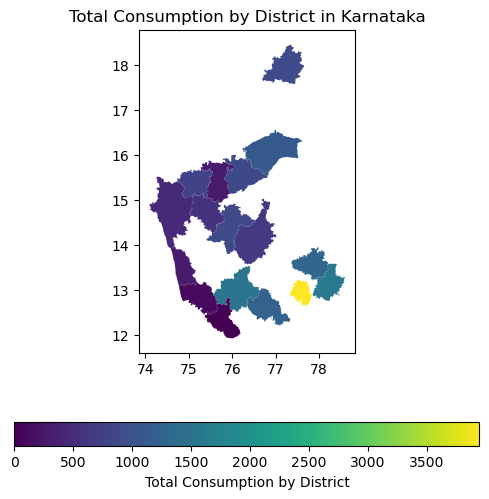

In [19]:
# Plot the map with consumption data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
data_map_data.plot(column="nonvegtotal_v", ax=ax, legend=True,
                   legend_kwds={'label': "Total Consumption by District",
                                'orientation': "horizontal"})
plt.title("Total Consumption by District in Karnataka")
plt.show()

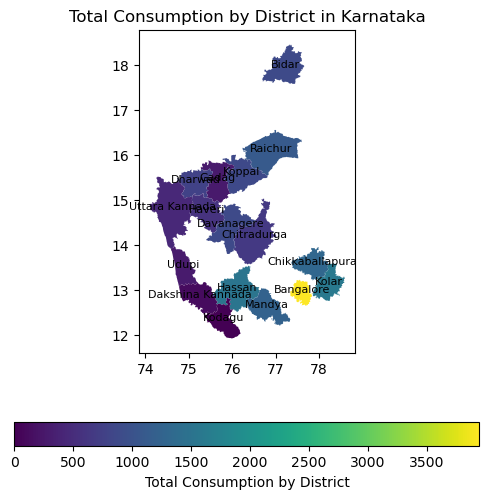

In [20]:
# Plot the map with consumption data and district labels
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
data_map_data.plot(column="nonvegtotal_v", ax=ax, legend=True,
                   legend_kwds={'label': "Total Consumption by District",
                                'orientation': "horizontal"})
data_map_data.apply(lambda x: ax.annotate(text=x.District, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title("Total Consumption by District in Karnataka")
plt.show()